# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Najmah Femalea]
- **Email:** [najmahfemalea15@gmail.com]
- **ID Dicoding:** [najmah_femalea]

## Menentukan Pertanyaan Bisnis

- APA PENGARUH CUACA TERHADAP PENYEWAAN SEPEDA?
- PADA BULAN APA SAJA PALING BANYAK DAN PALING SEDIKIT PEMINJAMAN SEPEDA DILAKUKAN?
- PADA MUSIM APA SAJA PALING BANYAK DAN PALING SEDIKIT PEMINJAMAN SEPEDA DILAKUKAN?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
#Menampilkan data hour.csv
hours = pd.read_csv("data/hour.csv")
hours.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
#Menampilkan data day.csv
days = pd.read_csv("data/day.csv")
days.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [4]:
#Memeriksa tipe data dari tiap kolom pada data hour.csv
hours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dari hasil diatas, terdapat kesalahan tipe data pada kolom dteday yang seharusnya menjadi datetime

In [5]:
#Memeriksa tipe data dari tiap kolom pada data day.csv
days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari hasil diatas, terdapat kesalahan tipe data pada kolom dteday yang seharusnya menjadi datetime

In [6]:
#Memeriksa duplikasi dan parameter statistik dari data hours
print("Jumlah duplikasi : ", hours.duplicated().sum())
hours.describe()

Jumlah duplikasi :  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
#Memeriksa apakah terdapat missing value pada data hours
hours.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dari hasil diatas, tidak terdapat missing value

In [8]:
#Memeriksa duplikasi dan parameter statistik dari data days
print("Jumlah duplikasi : ", days.duplicated().sum())
days.describe()

Jumlah duplikasi :  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
#Memeriksa apakah ada missing value pada data days
days.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dari hasil diatas, tidak terdapat missing value

### Cleaning Data

Mengubah tipe data pada kolom dteday

In [10]:
days['dteday'] = pd.to_datetime(days['dteday'])
hours['dteday'] = pd.to_datetime(hours['dteday'])

print(days.info())
print(hours.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Mengubah isi kolom season, mnth, weekday, weathersit, yr menjadi string agar mudah dipahami

In [11]:
#Mengubah isi kolom season pada data days dan hours
days.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hours.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

In [12]:
#Mengubah isi kolom mnth pada data days dan hours
days.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('January','February','March','April','May','June','July','August','September','October','November','December'), inplace=True)
hours.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('January','February','March','April','May','June','July','August','September','October','November','December'), inplace=True)

In [13]:
#Mengubah isi kolom weekday pada data days dan hours
days.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
hours.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

In [14]:
#Mengubah isi kolom weathersit pada data days dan hours
days.weathersit.replace((1,2,3,4), ('Clear','Misty','Light Snow/Rain','Heavy_rainsnow'), inplace=True)
hours.weathersit.replace((1,2,3,4), ('Clear','Misty','Light Snow/Rain','Heavy_rainsnow'), inplace=True)

In [15]:
#Mengubah isi kolom yr pada data days dan hours
days.yr.replace((0,1), ('2011','2012'), inplace=True)
hours.yr.replace((0,1), ('2011','2012'), inplace=True)

In [16]:
#Mengubah tipe data ke categorical
columns = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

for column in columns:
    days[column] = days[column].astype('category')
    hours[column] = hours[column].astype('category')

In [17]:
days.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,0,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [18]:
hours.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore ...

In [19]:
# melihat statistik dataframe days
days.describe(include="all")

<ipython-input-19-c74e49d3651e>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  days.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731,731.0,731,731.0,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,2,12,2.0,7,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,2012,August,0.0,Monday,1.0,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,366,62,710.0,105,500.0,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [20]:
hours.describe(include="all")

<ipython-input-20-1aaad2359db4>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hours.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379.0,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,2,12,NaN,2.0,7,2.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,2012,July,NaN,0.0,Saturday,1.0,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,8734,1488,NaN,16879.0,2512,11865.0,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,NaN,NaN,6.914405,NaN,NaN,NaN,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [21]:
# Demografi penyewa sepeda berdasarkan jam
hours.groupby(by="hr").agg({
    "cnt": "count"
}).sort_values(by="cnt", ascending=False)

,cnt
hr,
17,730
16,730
13,729
15,729
14,729
12,728
22,728
21,728
20,728


Dari hasil diatas, terlihat bahwa peminjam sepeda paling banyak disekitaran pukul 4 - 5 sore. dan paling sedikit disekitaran pukul 3 - 4 pagi.

In [22]:
# Demografi penyewa sepeda berdasarkan bulan
days.groupby(by="mnth").cnt.count().sort_values(ascending=False).reset_index()

,mnth,cnt
0,August,62
1,December,62
2,January,62
3,July,62
4,March,62
5,May,62
6,October,62
7,April,60
8,June,60
9,November,60


Dari hasil diatas, terlihat bahwa peminjam sepeda paling banyak berada di bulan January, Maret, Mei, July, Agustus, Oktober dan Desember yaitu 62 peminjam. sedangkan paling dikit berada di bulan February yaitu 57 peminjam

In [23]:
#Demografi penyewa sepeda berdasarkan weather
days.groupby(by="weathersit").agg({
    "cnt": ["mean", "max", "min", "sum"]
})

cnt                    
                        mean   max  min      sum
weathersit                                      
Clear            4876.786177  8714  431  2257952
Light Snow/Rain  1803.285714  4639   22    37869
Misty            4035.862348  8362  605   996858

In [24]:
#Demografi penyewa sepeda berdasarkan season
days.groupby(by='season').cnt.sum().sort_values(ascending=False).reset_index()

,season,cnt
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


Dapat dilihat bahwa peminjam sepeda paling banyak pada saat musim clear

In [25]:
days.groupby(by="holiday").agg({
    'cnt' : ['max', 'min', 'mean', 'sum']
})

cnt                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

Dapat diketahui bahwa peminjam lebih banyak pada saat weekdays daripada weekend

In [26]:
all_df = pd.merge(
    left=days,
    right=hours,
    how="left",
    left_on="cnt",
    right_on="cnt"
)
all_df.head()

,instant_x,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,holiday_y,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,Misty,0.344167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2011-01-02,Spring,2011,January,0,Sunday,0,Misty,0.363478,...,0,Monday,1,Clear,0.64,0.6212,0.57,0.2537,120.0,681.0
2,2,2011-01-02,Spring,2011,January,0,Sunday,0,Misty,0.363478,...,0,Tuesday,1,Clear,0.60,0.5909,0.69,0.2537,136.0,665.0
3,2,2011-01-02,Spring,2011,January,0,Sunday,0,Misty,0.363478,...,0,Thursday,1,Clear,0.66,0.6212,0.65,0.1642,147.0,654.0
4,2,2011-01-02,Spring,2011,January,0,Sunday,0,Misty,0.363478,...,0,Wednesday,1,Misty,0.52,0.5000,0.83,0.1045,24.0,777.0


## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa pengaruh cuaca terhadap penyewaan sepeda?

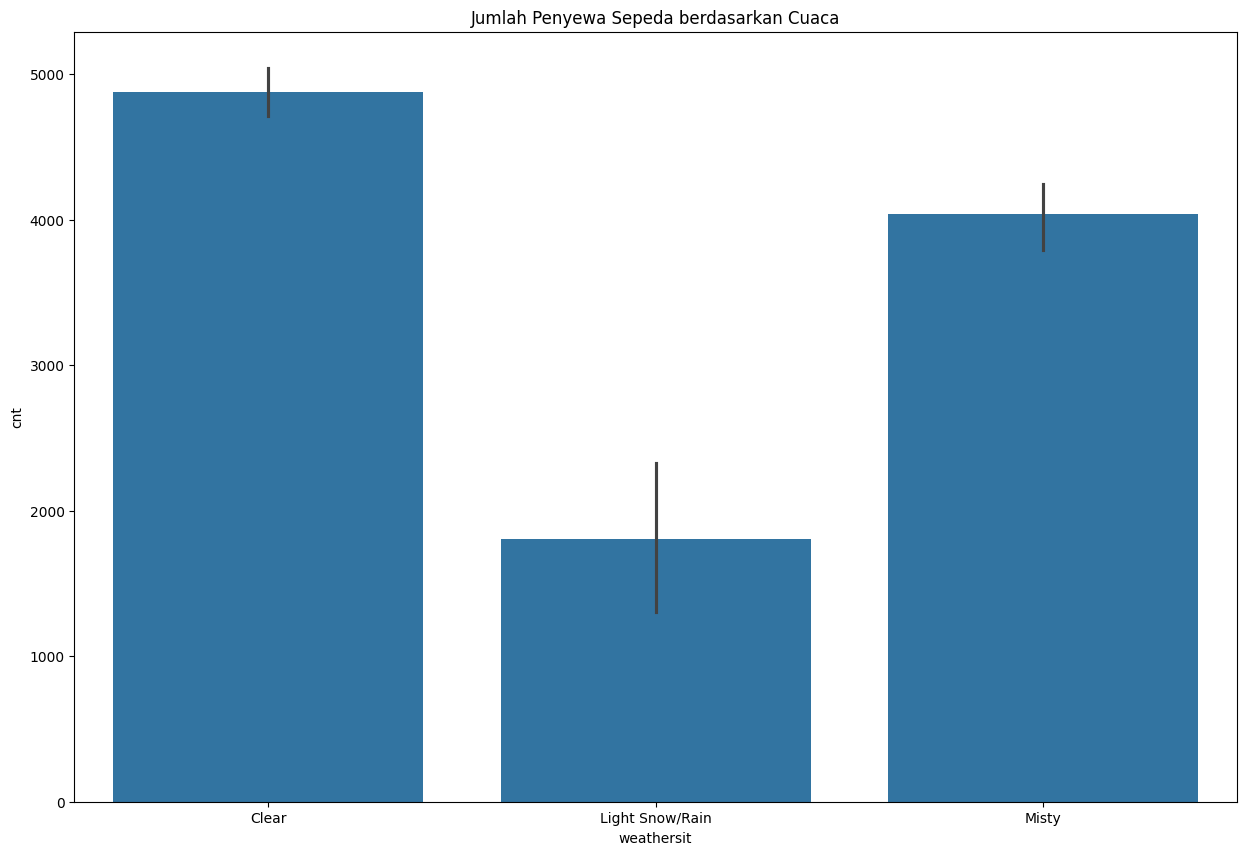

In [27]:
plt.figure(figsize=(15,10))
sns.barplot(
    x='weathersit', y='cnt', data=days)

plt.title('Jumlah Penyewa Sepeda berdasarkan Cuaca')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2 : Pada bulan apa saja paling banyak dan paling sedikit peminjaman sepeda dilakukan?

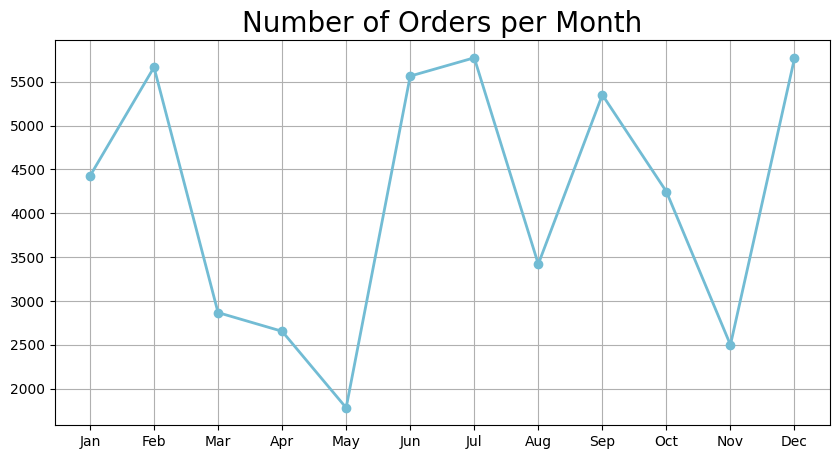

In [28]:
monthly_df = all_df.groupby('mnth_x')['cnt'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(monthly_df["mnth_x"], monthly_df["cnt"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Orders per Month", loc="center", fontsize=20)
plt.xticks(monthly_df["mnth_x"], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()

### Pertanyaan 3: Pada musim apa saja paling banyak dan paling sedikit peminjaman sepeda dilakukan?

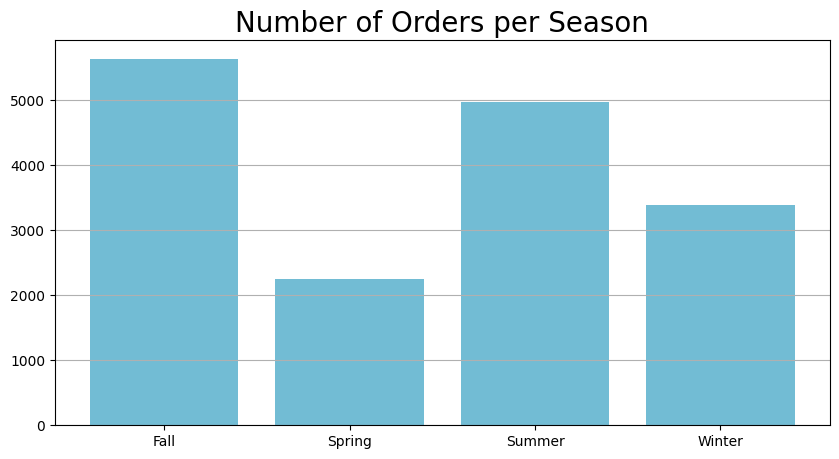

In [29]:
season_df = all_df.groupby('season_x')['cnt'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.bar(season_df["season_x"], season_df["cnt"], color="#72BCD4")
plt.title("Number of Orders per Season", loc="center", fontsize=20)
plt.grid(axis='y')
plt.show()

## Conclusion

- Pengaruh cuaca terhadap penyewaan sepeda :
Berdasarkan grafik diatas, bisa dilihat bahwa peminjam sepeda lebih suka mengendarai sepeda pada saat cerah hari (clear) daripada mengendarai pada saat berkabut (misty) dan hujan (Light Snow/Rain).

- Bulan yang paling banyak dan paling sedikit dilakukan penyewaan :  
Berdasarkan grafik diatas, diketahui bahwa ada peningkatan peminjaman sepeda pada bulan February - July - September - Desember dan terjadi penurusan drastis pada bulan Mei.


- Musim yang paling banyak dan paling sedikit dilakukan penyewaan :
Berdasarkan grafik diatas, bisa dilihat bahwa jumlah peminjam sepeda paling banyak terdapat di musim gugur/fall season dan paling sedikit pada musim semi/spring season

In [30]:
all_df.to_csv("all_df.csv", index=False)